<a href="https://colab.research.google.com/github/Carlosmagnobrusil/Food_sales_predictions/blob/main/salesprediction_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediccion de ventas**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 14 de enero de 2022 
*   Fechad de actualización: 23 de enero de 2022
*   Descripción: En esta actualización se realizó una revisión de la limpieza de datos y se realizan los graficos para tener una mejor idea de los datos con los que contamos y tener una idea de los productos 

### Carga de datos 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno


Mounted at /content/drive


In [ ]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 

In [ ]:
sales_data =  '/content/drive/MyDrive/Coding_Dojo/Proyecto /Data/sales_predictions.csv' #Nombro a la base
sales_df = pd.read_csv(sales_data) #le doy un nombre a la trama 
#de datos  ene ste caso el sugerido en la tarea como no tiene titulos el archivo txt uso el metodo header y que mantega los 
#valores vacios con na 
sales_df.head() #Observo que los datos hayan sido leidos de forma correcta

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Revisión de la base de datos 

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Estadistica descriptiva 

In [ ]:
itemweigth_mean = sales_df.groupby(['Outlet_Identifier', 'Item_Identifier'])['Item_Weight'].mean() 
# en la anterior linea de codigo obtengo los datos por tienda y por articula para saber el peso medio de cada producto en la tienda 
itemweigth_mean

Outlet_Identifier  Item_Identifier
OUT010             DRA12              11.600
                   DRA24              19.350
                   DRA59               8.270
                   DRB13               6.115
                   DRB25              12.300
                                       ...  
OUT049             NCZ18               7.825
                   NCZ30               6.590
                   NCZ42              10.500
                   NCZ53               9.600
                   NCZ54              14.650
Name: Item_Weight, Length: 8523, dtype: float64

In [ ]:
itemweigth_var =  sales_df.groupby(['Item_Identifier'])['Item_Weight'].var()
#La linea de codigo anterior es para conocer cual es el peso minimo que se esta entregando en cada local por producto    
itemweigth_var.head()

Item_Identifier
DRA12    0.0
DRA24    0.0
DRA59    0.0
DRB01    0.0
DRB13    0.0
Name: Item_Weight, dtype: float64

In [ ]:
itemweigth_std =  sales_df.groupby(['Item_Identifier'])['Item_Weight'].std()
#La linea de codigo anterior es para conocer cual es la dessviacion estandar del peso que se esta entregando en cada local por producto    
itemweigth_std

Item_Identifier
DRA12    0.0
DRA24    0.0
DRA59    0.0
DRB01    0.0
DRB13    0.0
        ... 
NCZ30    0.0
NCZ41    0.0
NCZ42    0.0
NCZ53    0.0
NCZ54    0.0
Name: Item_Weight, Length: 1559, dtype: float64

#### *Al observar que el peso de los productos no tiene una variacion podemos llenar estos valores vacios con el peso del mismo producto*

In [ ]:
sales_df = sales_df.sort_values(['Item_Identifier'], ascending=False) #Como los peso de los productos son iguales en todas las observaciones 
#primero realizo un ordenamiento por el peso para poder usar el metodo con el valor siguiente de cada item que se encuentra perdido 
sales_df=sales_df.reset_index() #reseteo el index para que al momento de llenar los datos con el bfill no equivoque


In [ ]:
sales_df['Item_Weight'].fillna(method = 'bfill', inplace = True) # esta liena le pido llenar el balor de los vaores NA con el valor anterior al estar ordenados
#por el identificador de item tomaran los mismo valores del item 
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [ ]:
mode_outletsize = sales_df['Outlet_Size'].mode()
mode_outletsize #otengo cual tamaño de tienda es el man comun estre los reatilers 

0    Medium
dtype: object

In [ ]:
sales_df['Outlet_Size'].fillna('Medium',inplace=True)  #lleno los missing values 
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [72]:
sales_df.head() #reviso la base 

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
1,1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
2,7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
3,7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
4,214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104


### Gráficos 

In [41]:
item_type2 = sales_df.groupby('Item_Type')['Item_Weight'].count()
item_type2

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Weight, dtype: int64

In [43]:
item_df = item_type2.reset_index()
item_df

,Item_Type,Item_Weight
0,Baking Goods,648
1,Breads,251
2,Breakfast,110
3,Canned,649
4,Dairy,682
5,Frozen Foods,856
6,Fruits and Vegetables,1232
7,Hard Drinks,214
8,Health and Hygiene,520
9,Household,910


In [70]:
item_df = item_df.rename(columns={'Item_Weight':'Item_Count'})
item_df

,Item_Type,Item_Count
0,Baking Goods,648
1,Breads,251
2,Breakfast,110
3,Canned,649
4,Dairy,682
5,Frozen Foods,856
6,Fruits and Vegetables,1232
7,Hard Drinks,214
8,Health and Hygiene,520
9,Household,910


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

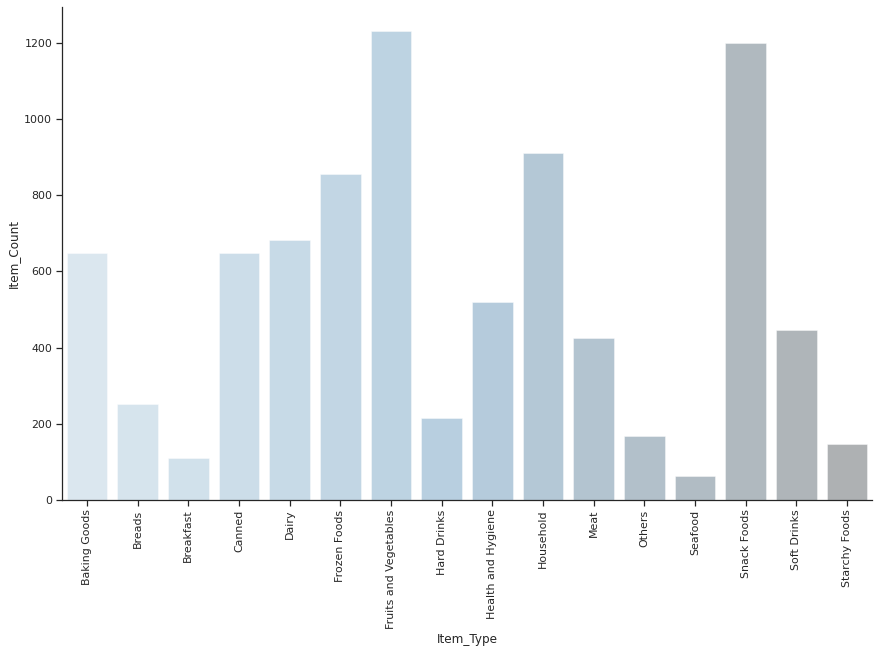

In [71]:
sns.set_style('ticks')
graph = sns.catplot(data = item_df , kind = 'bar' ,x = 'Item_Type', y = 'Item_Count',  palette="Blues_d", alpha=.4, height=6 )
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation=90)

In [78]:
item_vis = round(sales_df.groupby(['Item_Type'])['Item_Visibility'].mean(),2)
item_vis

Item_Type
Baking Goods             0.07
Breads                   0.07
Breakfast                0.09
Canned                   0.07
Dairy                    0.07
Frozen Foods             0.07
Fruits and Vegetables    0.07
Hard Drinks              0.06
Health and Hygiene       0.06
Household                0.06
Meat                     0.06
Others                   0.06
Seafood                  0.07
Snack Foods              0.07
Soft Drinks              0.06
Starchy Foods            0.07
Name: Item_Visibility, dtype: float64

In [79]:
item2_df = item_vis.reset_index()
item2_df

,Item_Type,Item_Visibility
0,Baking Goods,0.07
1,Breads,0.07
2,Breakfast,0.09
3,Canned,0.07
4,Dairy,0.07
5,Frozen Foods,0.07
6,Fruits and Vegetables,0.07
7,Hard Drinks,0.06
8,Health and Hygiene,0.06
9,Household,0.06


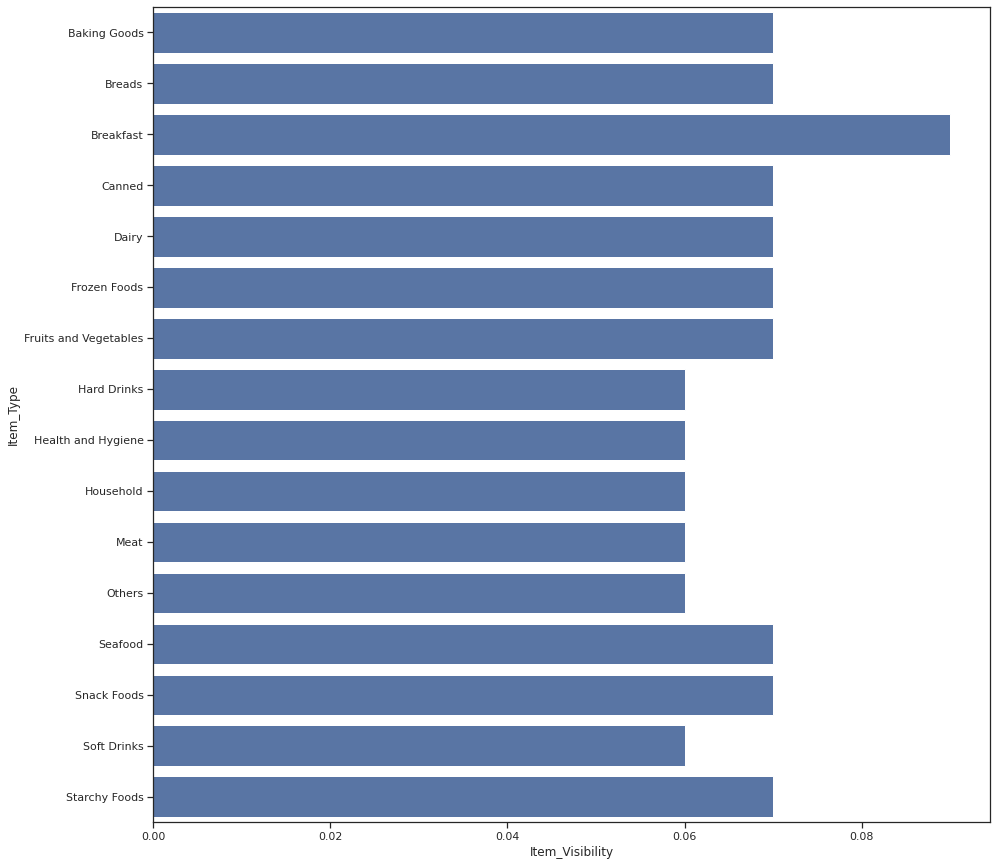

In [80]:
graph2 = sns.barplot(x = "Item_Visibility", y = "Item_Type", data = item2_df,label = "Visibility on show by item", color="b")